# Prácticas de Computer Vision

Primero creamos un recurso de Computer Vision en Azure <br>
![2022-06-10-17-40-39 (1)](https://user-images.githubusercontent.com/99369122/173171932-e35a97df-e75b-4978-9201-3266d0889876.gif)

In [7]:
# Establacemos las credenciales
key = '89ba4517e901468b9ee7e1447ea46107'
endpoint = 'https://computervisionpractice.cognitiveservices.azure.com/'

In [ ]:
# Instalamos la biblioteca de Computer Vision
!pip install --upgrade azure-cognitiveservices-vision-computervision

In [3]:
#Conectamos con Azure
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials

client = ComputerVisionClient(endpoint,CognitiveServicesCredentials(key))
# 1:33

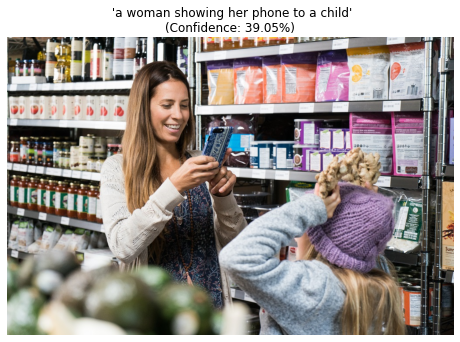

In [8]:
import vision
import os

%matplotlib inline

# Obtener la ruta de un archivo de imagen
imagePath ='./data/img/store_cam1.jpg'

# Obtener un cliente del servicio Computer Vision
computervisionClient = ComputerVisionClient(endpoint, CognitiveServicesCredentials(key))

# Obtener una descripción del servicio Computer Vision
imageStream = open(imagePath, "rb")
description = computervisionClient.describe_image_in_stream(imageStream)

# Mostrar una imagen y un subtítulo (código en helper_scripts/vision.py)
vision.show_image_caption(image_path, description)

Parece bastante acertado.

Vamos a probar con otra imagen.

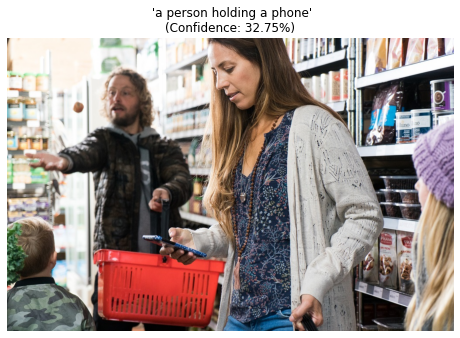

In [10]:
# Obtener la ruta de un archivo de imagen
imagePath ='./data/img/store_cam2.jpg'

# Obtener una descripción del servicio Computer Vision
imageStream = open(imagePath, "rb")
description = computervisionClient.describe_image_in_stream(imageStream)

# Mostrar una imagen y un subtítulo (código en helper_scripts/vision.py)
vision.show_image_caption(imagePath, description)

Vamos a analizar más características

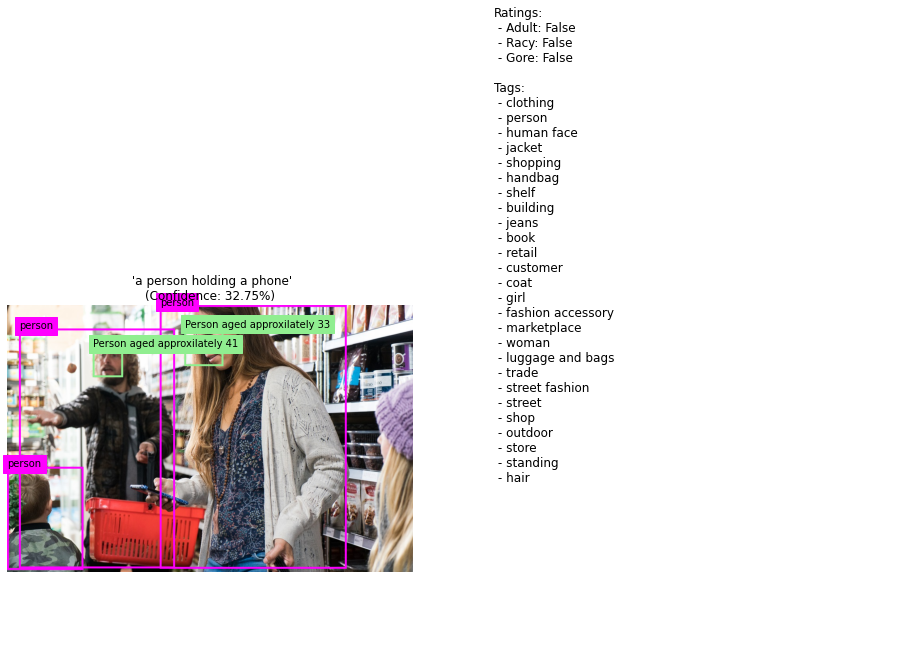

In [12]:
# Obtener la ruta de un archivo de imagen
imagePath ='./data/img/store_cam2.jpg'

# Indicar las características que se quieren analizar
features = ['Description', 'Tags', 'Adult', 'Objects', 'Faces']

# Obtener un análisis del servicio Computer Vision
imageStream = open(imagePath, "rb")
analysis = computervisionClient.analyze_image_in_stream(imageStream, visual_features=features)

# Mostrar los resultados del análisis (código en helper_scripts/vision.py)
vision.show_image_analysis(imagePath, analysis)

# FaceApi

Primero creamos un recurso de FaceApi en Azure <br>

https://user-images.githubusercontent.com/99369122/173159515-9601f363-044a-47e8-9db7-707839006733.mp4

In [13]:
# Establacemos las credenciales
key = '821dcaf3652447b9bc6a607c54df1dde'
endpoint = 'https://faceapipractice.cognitiveservices.azure.com/'

In [ ]:
# Instalamos la biblioteca de Vision face
!pip install azure-cognitiveservices-vision-face

In [15]:
#Conectamos con Azure 
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
import faces
import os
%matplotlib inline

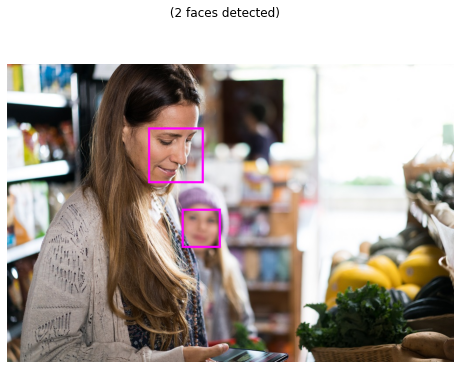

In [16]:
# Crear un cliente de detección facial.
faceClient = FaceClient(endpoint, CognitiveServicesCredentials(key))

# Abrir una imagen
imagePath ='./data/img/store_cam3.jpg'
imageStream = open(imagePath, "rb")

# Detectar caras
detectedFaces = faceClient.face.detect_with_stream(image=imageStream)

# Mostrar las caras (código en python_code/faces.py)
faces.show_faces(imagePath, detectedFaces)

Se asignará un ID a cada cara detectada, para que la aplicación pueda identificar cada cara detectada.



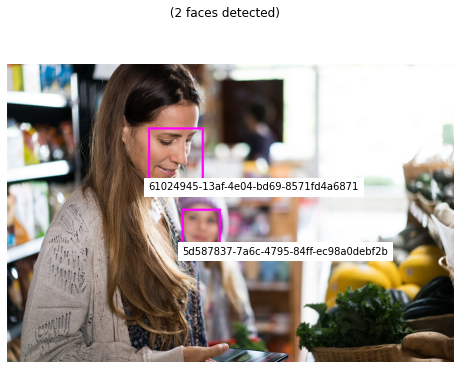

In [17]:
# Abrir una imagen

imagePath ='./data/img/store_cam3.jpg'
imageStream = open(imagePath, "rb")

# Detectar caras
detectedFaces = faceClient.face.detect_with_stream(image=imageStream)

# Mostrar las caras (código en python_code/faces.py)
faces.show_faces(imagePath, detectedFaces, show_id=True)

## Analizar los atributos faciales

Face puede ir mucho más allá del simple reconocimiento facial. También puede analizar las características y expresiones de las caras para indicar la edad y el estado emocional. Ejecute el siguiente código para analizar los atributos faciales de un cliente.

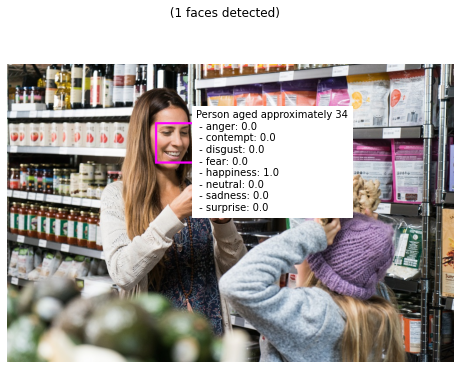

In [21]:
# Abrir una imagen
imagePath ='./data/img/store_cam1.jpg'
imageStream = open(imagePath, "rb")

# Detectar caras y determinados atributos faciales
attributes = ['age', 'emotion']
detectedFaces = faceClient.face.detect_with_stream(image=imageStream, return_face_attributes=attributes)

# Mostrar las caras y los atributos (código en python_code/faces.py)
faces.show_face_attributes(imagePath, detectedFaces)

Según las puntuaciones de emoción detectadas para el cliente de la imagen, el cliente parece contento con su experiencia de compra.

## Búsqueda de caras similares
Los ID de caras creados para cada cara detectada se usan para identificar cada una de ellas. Puede usar estos ID para comparar una cara detectada con otras detectadas anteriormente y encontrar caras con características similares.



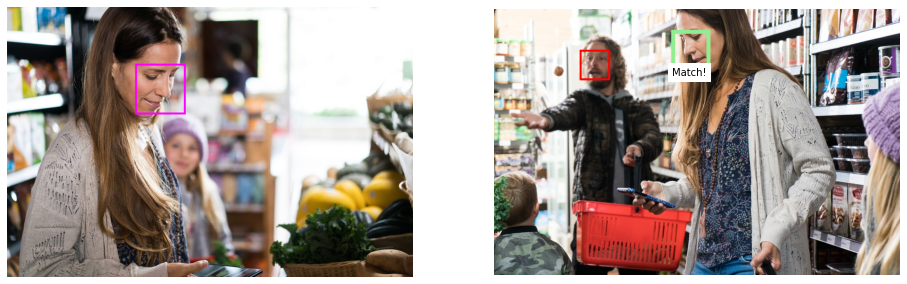

In [25]:
# Obtener el identificador de la primera cara de la imagen 1
imagePath ='./data/img/store_cam3.jpg'
imageStream1 = open(imagePath, "rb")
imageFaces1 = faceClient.face.detect_with_stream(image=imageStream1)
face_1 = imageFaces1[0]

# Obtener los identificadores de caras en una segunda imagen
imagePath2 ='./data/img/store_cam2.jpg'
imageStream2 = open(imagePath2, "rb")
imageFaces2 = faceClient.face.detect_with_stream(image=imageStream2)
imageFaceId = list(map(lambda face: face.face_id, imageFaces2))

# Encontrar las caras de la imagen 2 que sean similares a la de la imagen 1
similarFaces = faceClient.face.find_similar(face_id=face_1.face_id, face_ids=imageFaceId)

# Mostrar la cara de la imagen 1 y las caras similares de la imagen 2 (código en python_code/face.py)
faces.show_similar_faces(imagePath, face_1, imagePath2, imageFaces2, similarFaces)

## Reconocimiento de caras
Hasta ahora, hemos visto que Face puede detectar caras y características faciales e identificar dos caras similares entre sí. Podemos ir más allá si implementamos una solución de reconocimiento facial en la que se entrene a Face para reconocer la cara de una persona en concreto. Esto puede ser útil en diferentes casos, como para etiquetar fotografías de amigos automáticamente en redes sociales o usar el reconocimiento facial como un sistema biométrico de verificación de identidad.

Para ver cómo funciona, supongamos que Northwind Traders quiere usar el reconocimiento facial para garantizar que solo los empleados autorizados del departamento de TI pueda acceder a los sistemas seguros.

Lo primero que haremos es crear un *grupo de personas* que represente a los empleados autorizados.

In [27]:
group_id = 'employee_group_id'
try:
    # Elimine el grupo si ya existe
    faceClient.person_group.delete(group_id)
except Exception as ex:
    print(ex.message)
finally:
    faceClient.person_group.create(group_id, 'employees')
    print ('Group created!')
    group_id = 'employee_group_id'


(PersonGroupNotFound) Person group is not found. (Parameter 'personGroupId')
Group created!


Una vez creado el *grupo de personas*, podemos agregar una persona para cada empleado que queramos incluir en el grupo y, después, agregar varias fotografías de cada persona para que Face pueda analizar las características faciales de cada persona. Lo ideal es que las imágenes muestren a la misma persona con diferentes poses y gestos.

Agregaremos un solo empleado llamado Wendell y tres fotografías suyas

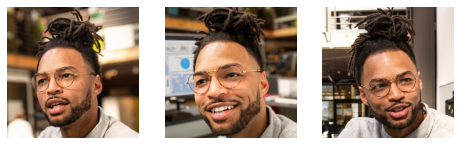

In [30]:
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

# Agregar una persona (Wendell) al grupo
wendell = faceClient.person_group_person.create(group_id, 'Wendell')

# Obtener una foto de wendell
folder ='./data/wendell'
wendell_pics = os.listdir(folder)

# Registrar las fotos
i = 0
fig = plt.figure(figsize=(8, 8))
for pic in wendell_pics:
    # Agregue cada foto a la persona en el grupo de personas
    img_path = os.path.join(folder, pic)
    img_stream = open(img_path, "rb")
    faceClient.person_group_person.add_face_from_stream(group_id, wendell.person_id, img_stream)

    # Muestre cada imagen
    img = Image.open(img_path)
    i +=1
    a=fig.add_subplot(1,len(wendell_pics), i)
    a.axis('off')
    imgplot = plt.imshow(img)
plt.show()

Una vez agregadas la persona y las fotografías, podemos entrenar a Face para que reconozca a Wendell.

In [32]:
faceClient.person_group.train(group_id)
print('Trained!')

Trained!


Una vez entrenado el modelo, podemos usarlo para identificar caras reconocidas en una imagen.

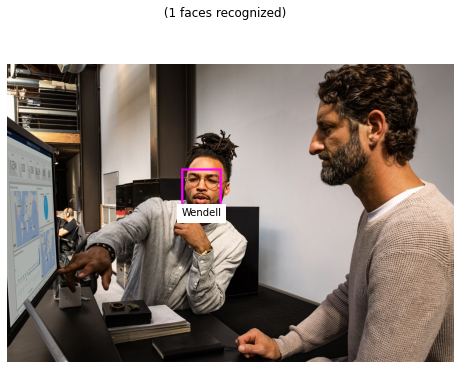

In [33]:
# Obtener los identificadores de caras en una segunda imagen
imagePath ='./data/img/employees.jpg'
image_stream = open(imagePath, "rb")
imageFaces = faceClient.face.detect_with_stream(image=image_stream)
imageFaceId = list(map(lambda face: face.face_id, imageFaces))

# Obtener los nombres de caras reconocidas
faceNames = {}
recognized_faces = faceClient.face.identify(imageFaceId, group_id)
for face in recognized_faces:
    personName = faceClient.person_group_person.get(group_id, face.candidates[0].person_id).name
    faceNames[face.face_id] = personName

# Mostrar las caras reconocidas
faces.show_recognized_faces(imagePath, imageFaces, faceNames)